# Lab Exercise 1 
## Predicting House prices
### Submitted by: Nigel Haim N. Sebastian

#### Importing 
- When Imported pandas it prompts me that "Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0)"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Loading and checking the dataset 

In [2]:
data = pd.read_csv("House_Rent_Dataset.csv")
data.value_counts()

Posted On   BHK  Rent    Size  Floor            Area Type    Area Locality                  City       Furnishing Status  Tenant Preferred  Bathroom  Point of Contact
2022-04-13  3    260000  1800  10 out of 11     Carpet Area  JVPD Scheme                    Mumbai     Furnished          Family            4         Contact Agent       1
2022-06-22  3    17000   1200  Ground out of 2  Super Area   Selaiyur                       Chennai    Unfurnished        Bachelors/Family  3         Contact Owner       1
                 15000   2200  1 out of 2       Super Area   Irumbuliyur                    Chennai    Unfurnished        Bachelors         3         Contact Owner       1
                         1850  1 out of 1       Super Area   Tarapuri Colony, Secunderabad  Hyderabad  Semi-Furnished     Bachelors/Family  2         Contact Owner       1
                 13000   900   1 out of 4       Super Area   Perambur                       Chennai    Unfurnished        Bachelors/Family  1    

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


# Check for any errors in the floor

In [4]:
index = 0

def Floor_Score(row):
    r = str(row).split(' out of ')
    if len(r) == 1:
        return None
    try:
        if 'GROUND' in str(r).upper():
            r[0] = 1
            # r[1] = int(r[1]) + 1
            # print(r[0], r[1])

        elif 'UPPER BASEMENT' in str(r).upper():
            r[0] = 2
            # r[1] = int(r[1]) + 2
            # r[1] = int(r[1])
        elif 'LOWER BASEMENT' in str(r).upper():
            r[0] = 3
            # r[1] = int(r[1]) + 3
        else:
            r[0] = int(r[0])
            r[1] = int(r[1])
        if int(r[0]) > int(r[1]):
            return None

        return int(r[0]) / int(r[1])
    except:
        print("Error")
    index += 1


data['Floor'] = data['Floor'].apply(Floor_Score)
data.dropna(subset=['Floor'], inplace=True)
data.info()
data.head(20)


<class 'pandas.core.frame.DataFrame'>
Index: 4732 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4732 non-null   object 
 1   BHK                4732 non-null   int64  
 2   Rent               4732 non-null   int64  
 3   Size               4732 non-null   int64  
 4   Floor              4732 non-null   float64
 5   Area Type          4732 non-null   object 
 6   Area Locality      4732 non-null   object 
 7   City               4732 non-null   object 
 8   Furnishing Status  4732 non-null   object 
 9   Tenant Preferred   4732 non-null   object 
 10  Bathroom           4732 non-null   int64  
 11  Point of Contact   4732 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 480.6+ KB


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,0.500000,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,0.333333,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,0.333333,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,0.500000,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,0.500000,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,1.000000,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,0.250000,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,0.500000,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,0.500000,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,0.333333,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [5]:

CheckNegative = data['Rent'].where(data['Rent'] < 0)
CheckNegative.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Rent, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4732 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4732 non-null   object 
 1   BHK                4732 non-null   int64  
 2   Rent               4732 non-null   int64  
 3   Size               4732 non-null   int64  
 4   Floor              4732 non-null   float64
 5   Area Type          4732 non-null   object 
 6   Area Locality      4732 non-null   object 
 7   City               4732 non-null   object 
 8   Furnishing Status  4732 non-null   object 
 9   Tenant Preferred   4732 non-null   object 
 10  Bathroom           4732 non-null   int64  
 11  Point of Contact   4732 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 480.6+ KB


**This concludes that there are no null values in the dataset**

In [7]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

### Data Analysis

<BarContainer object of 6 artists>

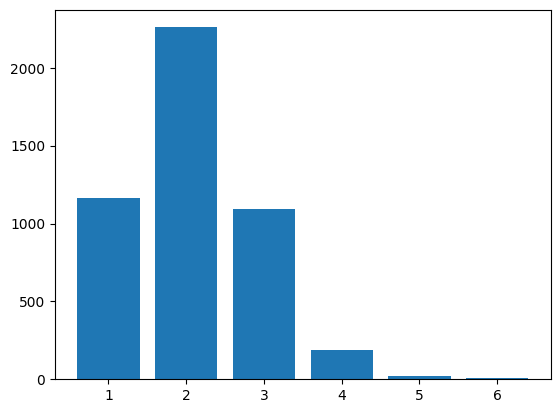

In [8]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

In [9]:
data['Area Locality'].value_counts()

Area Locality
Bandra West                                           37
Gachibowli                                            29
Electronic City                                       24
Miyapur, NH 9                                         22
Velachery                                             22
                                                      ..
Irla, Vile Parle West                                  1
Serenity Complex                                       1
Charkop Sector 6                                       1
Hiranandani Gardens Odyssey I, Hiranandani Gardens     1
Manikonda, Hyderabad                                   1
Name: count, Length: 2231, dtype: int64

<Axes: xlabel='BHK', ylabel='Rent'>

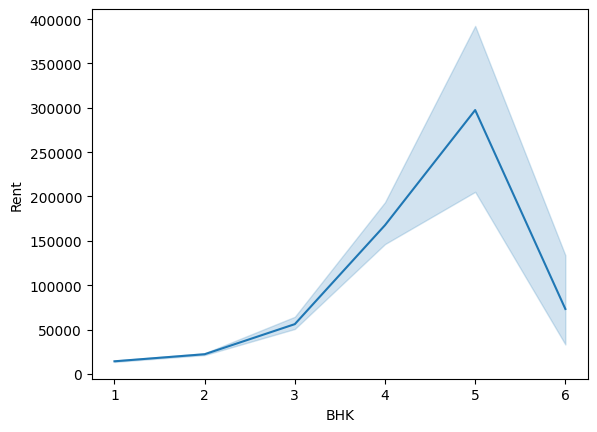

In [10]:
sns.lineplot(x=data['BHK'], y=data['Rent'], data=data)

In [11]:
sorted_date = data.sort_values(by='Posted On') 

# sorted_date.head(20)

<Axes: xlabel='Posted On', ylabel='Rent'>

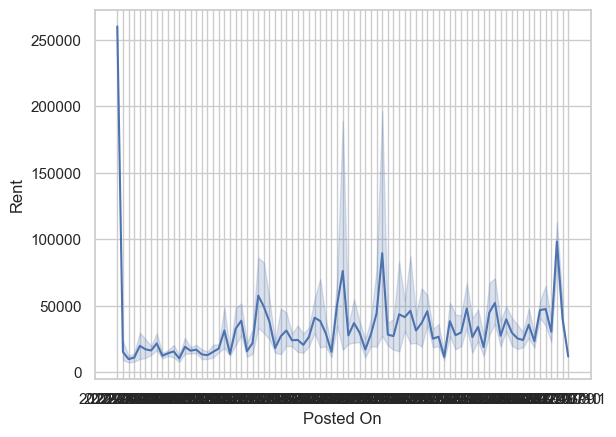

In [12]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=sorted_date['Posted On'], y=sorted_date['Rent'], data=data)

<BarContainer object of 4732 artists>

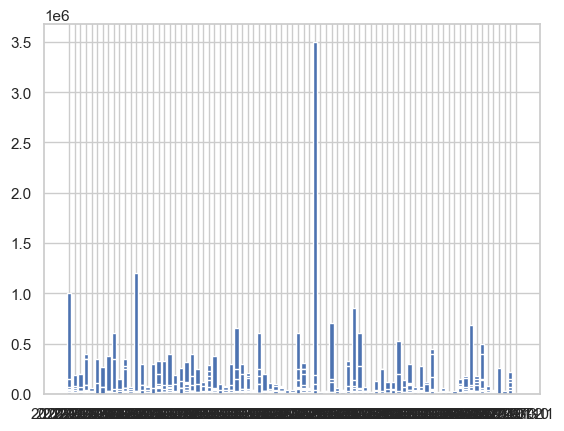

In [13]:
plt.bar(data['Posted On'], data['Rent'])

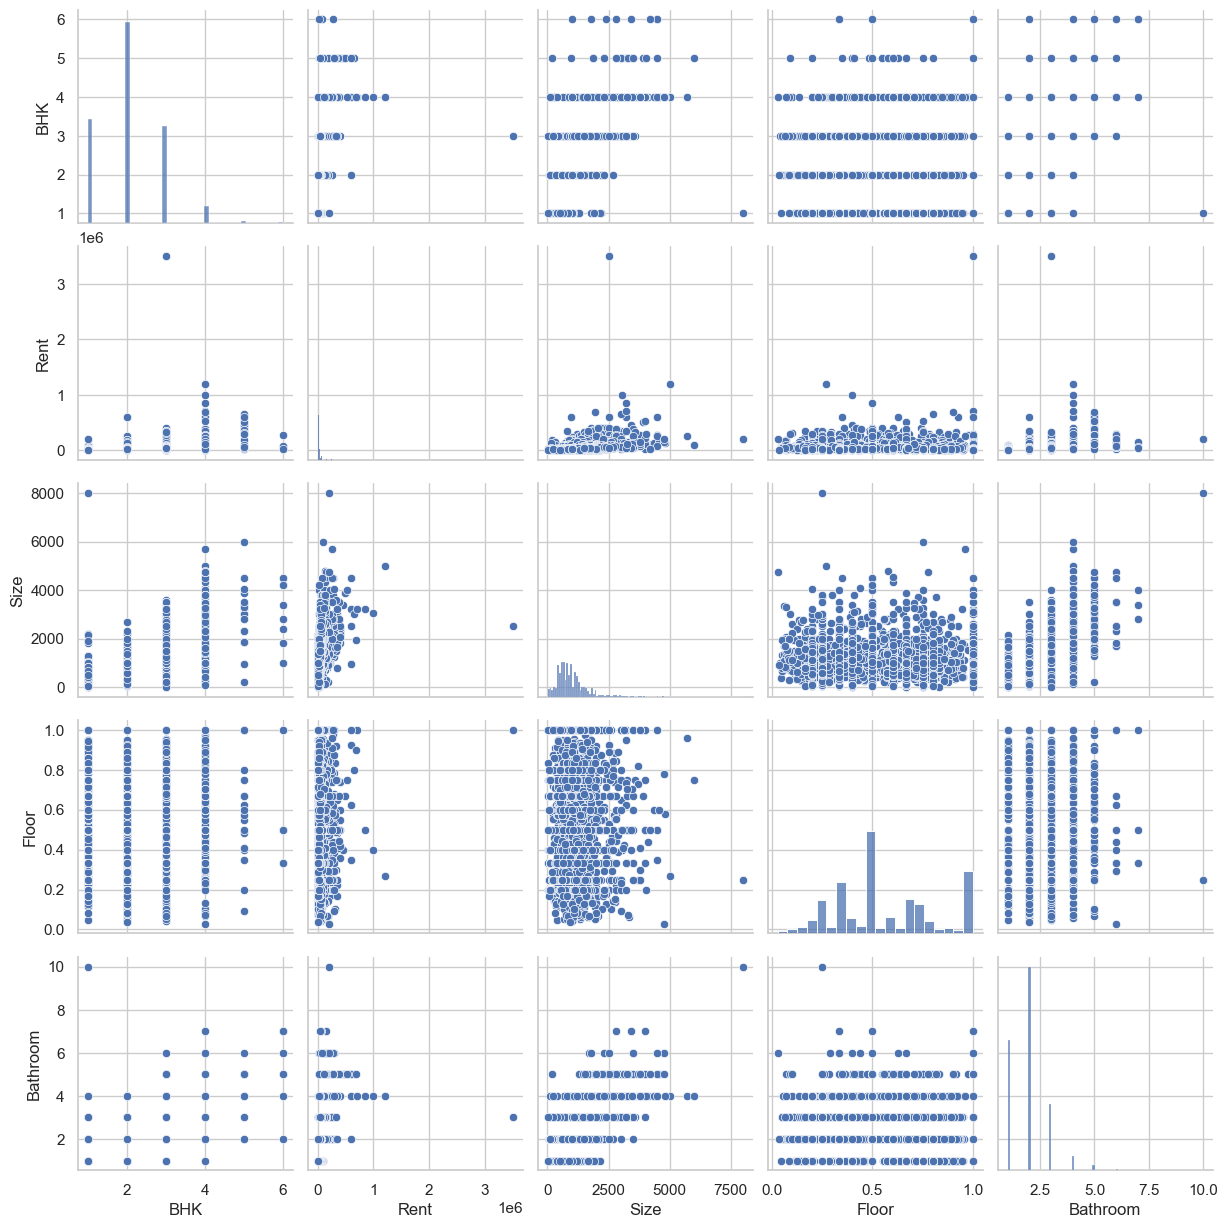

In [14]:
sns.pairplot(data)

array([[<Axes: title={'center': 'BHK'}>,
        <Axes: title={'center': 'Rent'}>],
       [<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Floor'}>],
       [<Axes: title={'center': 'Bathroom'}>, <Axes: >]], dtype=object)

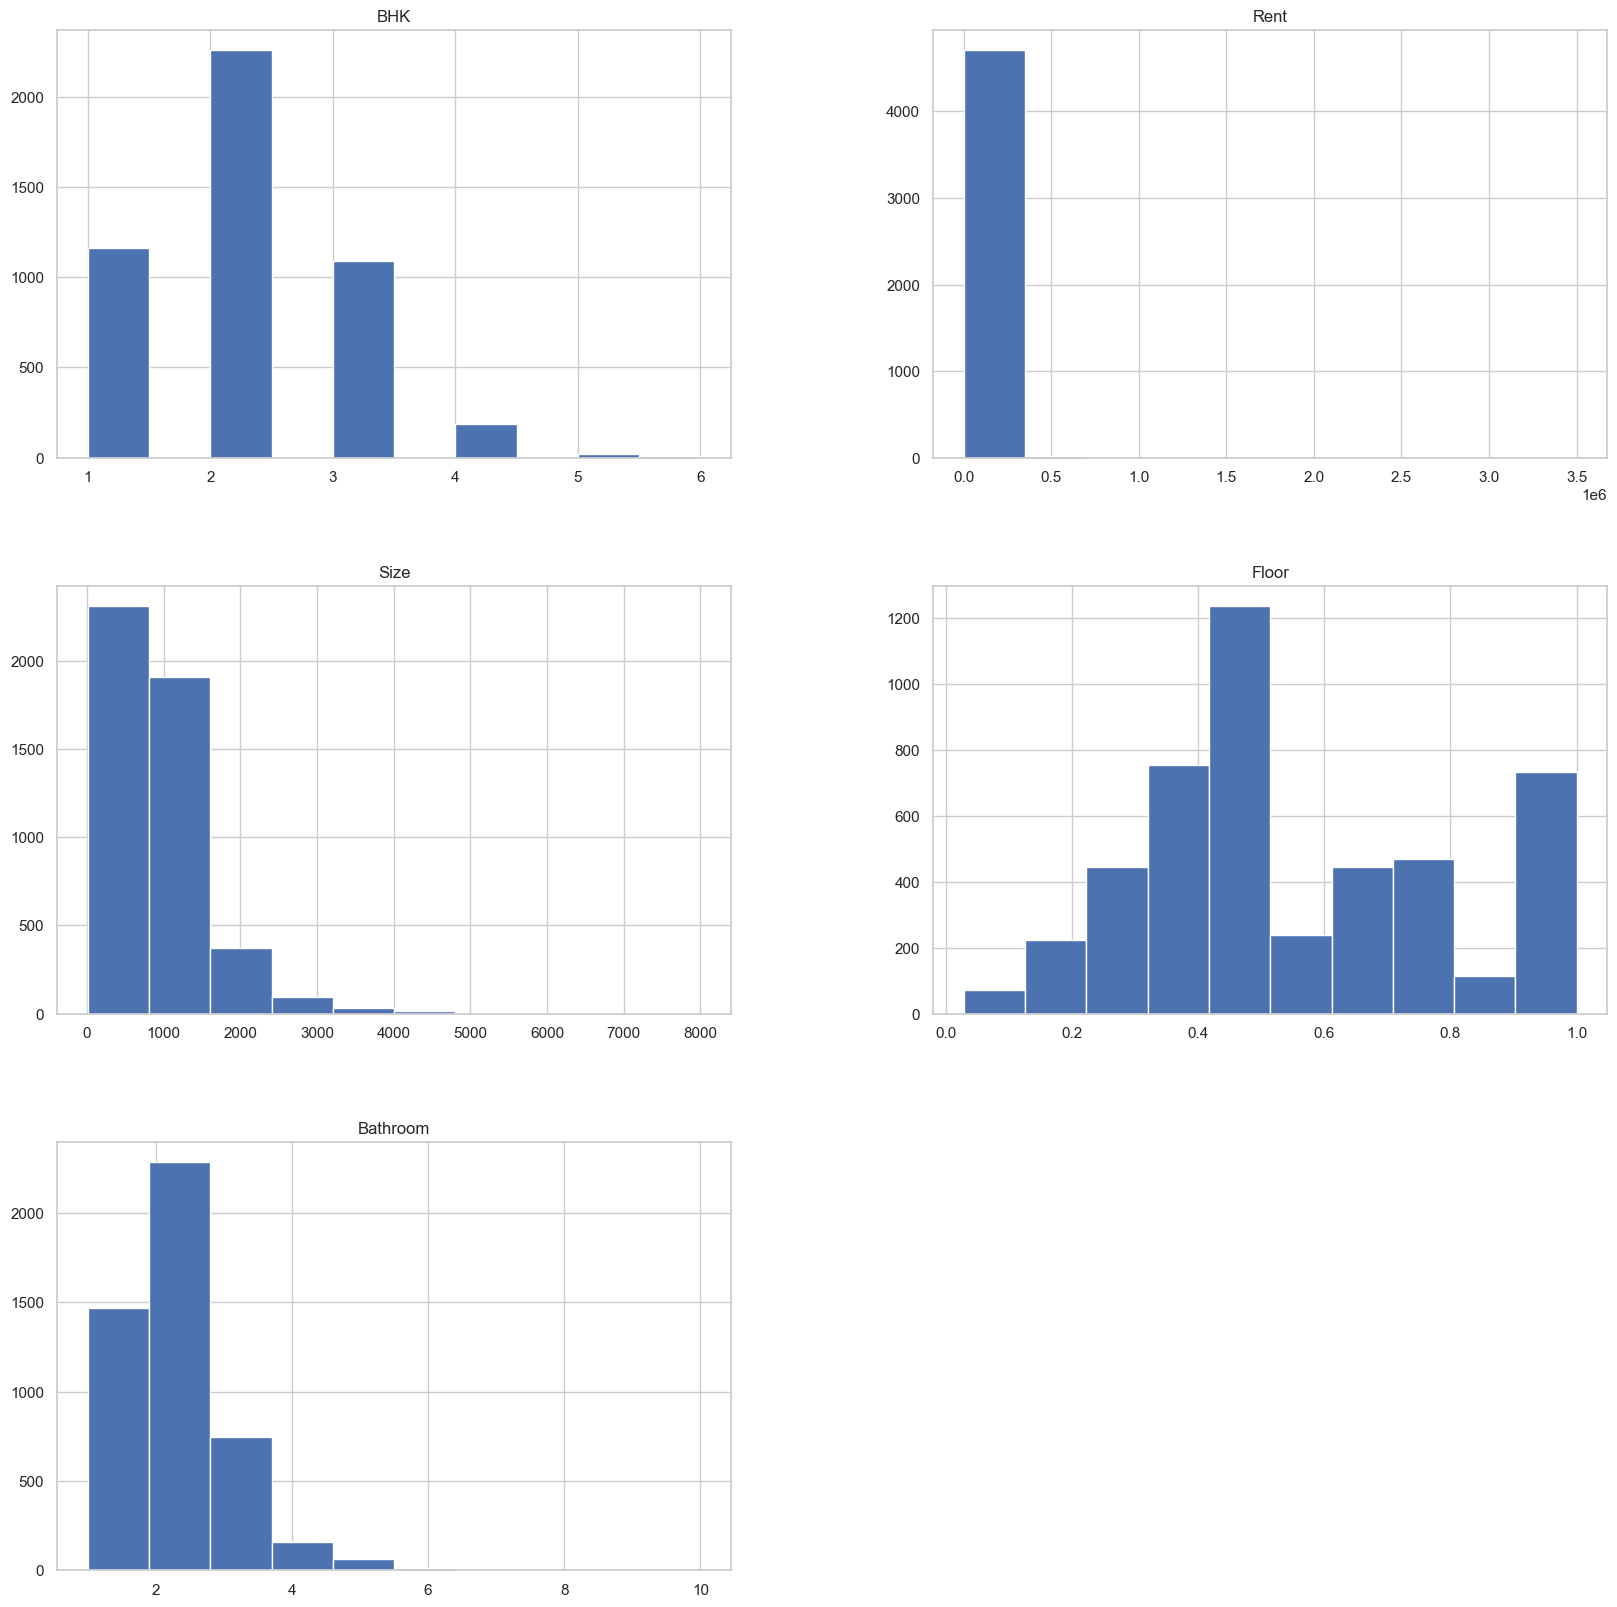

In [15]:
data.hist(figsize=(20, 20))

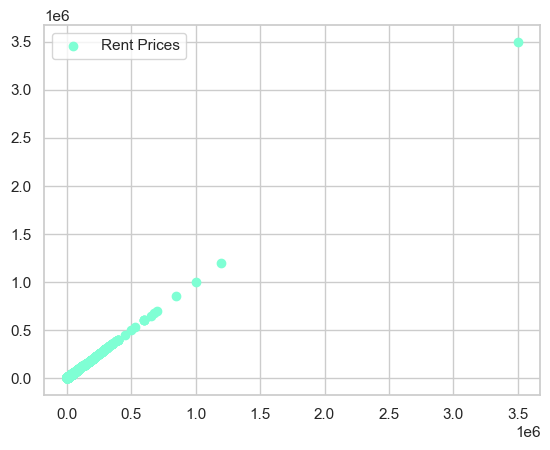

In [16]:
plt.figure()
plt.scatter(data['Rent'], data['Rent'], color='aquamarine', label='Rent Prices' )
plt.legend()

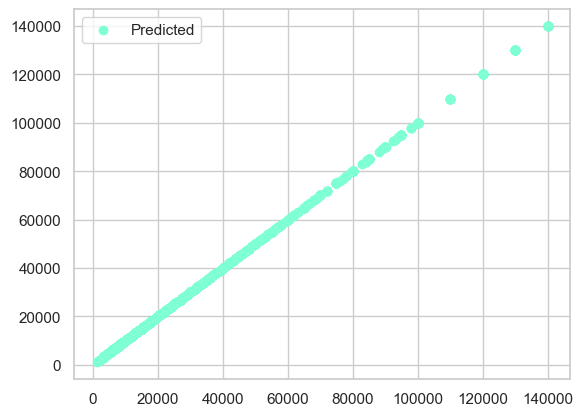

In [17]:
data = data[data['Rent'] < 150000]
plt.figure()
plt.scatter(data['Rent'], data['Rent'], color='aquamarine', label='Predicted' )
plt.legend()

# data = data[data['Rent'] < 120000]
# plt.figure()
# plt.scatter(data['Rent'], data['Rent'], color='aquamarine', label='Predicted' )
# plt.legend()

# data = data[data['Rent'] < 100000]
# plt.figure()
# plt.scatter(data['Rent'], data['Rent'], color='aquamarine', label='Predicted' )
# plt.legend()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4534 non-null   object 
 1   BHK                4534 non-null   int64  
 2   Rent               4534 non-null   int64  
 3   Size               4534 non-null   int64  
 4   Floor              4534 non-null   float64
 5   Area Type          4534 non-null   object 
 6   Area Locality      4534 non-null   object 
 7   City               4534 non-null   object 
 8   Furnishing Status  4534 non-null   object 
 9   Tenant Preferred   4534 non-null   object 
 10  Bathroom           4534 non-null   int64  
 11  Point of Contact   4534 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 460.5+ KB


# Preprocessing

## Logarithmic Transformation in Linear Regression Models

https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c

https://stats.stackexchange.com/questions/145383/getting-negative-predicted-values-after-linear-regression

Text(0.5, 0, 'Price')

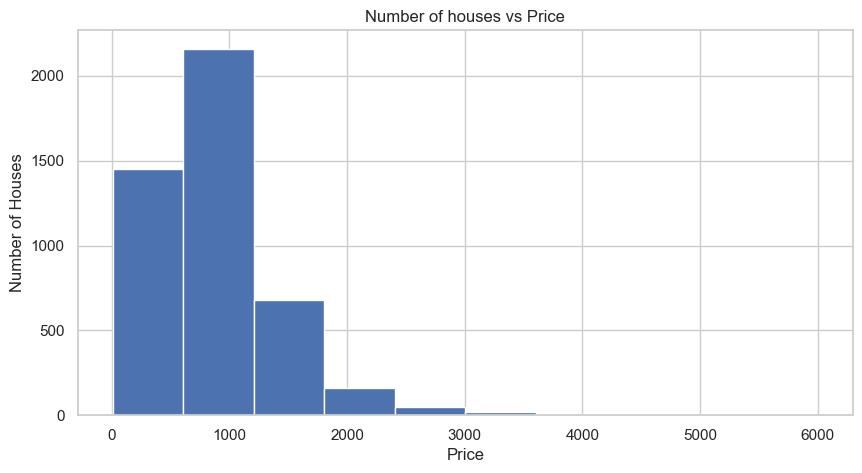

In [19]:
data.hist('Size', figsize=(10, 5))
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")

### After

In [20]:
# data['Rent'] = np.log(data['Rent'] + 1)
# data.hist('Rent', figsize=(10, 5))
# plt.title('Number of houses vs Price')
# plt.ylabel('Number of Houses')
# plt.xlabel("Price")

# data.hist('BHK', figsize=(10, 5))

C:\Users\nigel\AppData\Local\Temp\ipykernel_21580\1318459247.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Floor'] = np.log(data['Floor'] + 1)


<Axes: >

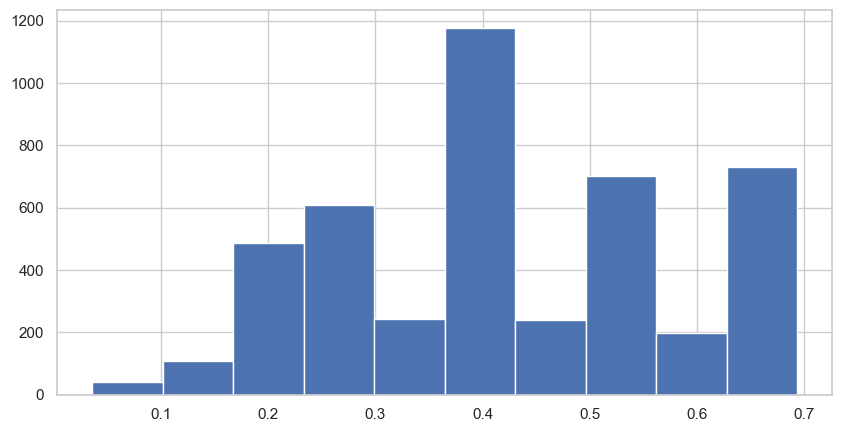

In [21]:
# data['BHK'] = np.log(data['BHK'] + 1)
# plt.title('Number of houses vs Price')
# plt.ylabel('Number of Houses')
# plt.xlabel("Price")

# data['Bathroom'] = np.log(data['Bathroom'] + 1)
# data.hist('Bathroom', figsize=(10, 5))
# plt.title('Number of houses vs Price')
# plt.ylabel('Number of Houses')
# plt.xlabel("Price")

# data['Size'] = np.log(data['Size'] + 1)
# plt.title('Number of houses vs Price')
# plt.ylabel('Number of Houses')
# plt.xlabel("Price")

data['Floor'] = np.log(data['Floor'] + 1)
data['Floor'].hist(figsize=(10, 5))



### Fixing some data for modelling

**Converting all white spaces to undersdcore (_)**

In [22]:
# sorted_date['Area Locality'] = sorted_date['Area Locality'].replace(' ', '_')
# sorted_date.head(20)

### One hot encoding 

In [23]:
def one_hot_encode(data, column):
 encoded = pd.get_dummies(data[column], drop_first= True)
 data = data.drop(column, axis = 1)
 data = data.join(encoded)
 return data

### Adding values of Area Type and City

In [24]:
data = data[['BHK', 'Bathroom', 'Furnishing Status', 'Rent', 'City', 'Size', 'Tenant Preferred', 'Point of Contact', 'Floor']]
data = one_hot_encode(data, 'City')
data = one_hot_encode(data, 'Point of Contact')
data = one_hot_encode(data, 'Tenant Preferred')


In [25]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data[['Furnishing Status']] = enc.fit_transform(data[['Furnishing Status']])
data 

,BHK,Bathroom,Furnishing Status,Rent,Size,Floor,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Contact Builder,Contact Owner,Bachelors/Family,Family
0,2,2,2.0,10000,1100,0.405465,False,False,False,True,False,False,True,True,False
1,2,1,1.0,20000,800,0.287682,False,False,False,True,False,False,True,True,False
2,2,1,1.0,17000,1000,0.287682,False,False,False,True,False,False,True,True,False
3,2,1,2.0,10000,800,0.405465,False,False,False,True,False,False,True,True,False
4,2,1,2.0,7500,850,0.405465,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,1.0,15000,1000,0.470004,False,False,True,False,False,False,True,True,False
4742,3,3,1.0,29000,2000,0.223144,False,False,True,False,False,False,True,True,False
4743,3,3,1.0,35000,1750,0.470004,False,False,True,False,False,False,False,True,False
4744,3,2,1.0,45000,1500,0.516691,False,False,True,False,False,False,False,False,True


# Clustering Area Locality (Unfinished Attempt)

In [26]:
# from Levenshtein import distance
# from sklearn.cluster import dbscan

# def lev_metric(x,y):
#     i, j = int(x[0]), int(y[0])     # extract indices
#     return distance(data['Area Locality'].iloc[i], data['Area Locality'].iloc[j])

# x = np.arange(len(data)).reshape(-1, 1)
# f_AL = (dbscan(x, metric=lev_metric, eps=5, min_samples=2) )




In [27]:

# for i in range(len(f_AL[1])):
#     # print(f_AL[1][i])
#     data[['Area Locality']].replace(data[['Area Locality']].iloc[i], f_AL[1][i])      


# data.head(10)

### Training and Test Spill

In [28]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

#Attempt to fix the distribution on the training data set

### Standardize

In [30]:
# from sklearn.preprocessing import PolynomialFeatures -11k
# X_test = sc.fit_transform(X_test)
# sc= MinMaxScaler()
# sc = RobustScaler()
# from sklearn.preprocessing import MinMaxScaler
# 0.57
# from sklearn.preprocessing import RobustScaler 
# 0.57
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



### Modeling 

In [31]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 3179.93921755,  4231.33143619, -1696.50924328,  6839.41157078,
         125.90743057,  -603.67873485,  1347.46666257, -1641.57863413,
        -903.28931482, 10644.93193236,   -47.26380969, -5724.03875343,
         210.06523484,  -499.78493903])

### Quantitative Evaluation

In [32]:
y_preds = model.predict(X_test)
print(y_preds)

[ 3.05925621e+04  3.22935510e+04  2.19679558e+04  1.99201651e+04
  8.85400794e+03  4.28434797e+04 -8.54878911e+03  2.73267913e+04
  1.21317481e+04 -8.28340549e+03  1.94162950e+04  5.17613533e+04
  8.62995886e+03  3.74224727e+04 -3.50242692e+02  1.63877166e+04
  3.54375085e+04  1.03547211e+02  1.42803291e+04  1.56586049e+04
  1.85069905e+04  5.47468825e+04  2.34956597e+04  1.16119899e+04
  3.26302817e+04  1.28806903e+04  1.03981932e+04  3.03418207e+04
  1.69033341e+04  3.43747778e+04  2.04264020e+04  3.62788042e+04
  3.44591604e+04  1.11440269e+04  3.02354861e+04  3.20809789e+04
  4.91663086e+02  3.10340451e+04  2.06996496e+04  2.55374692e+04
  4.60475554e+04  7.21100964e+02  1.69790634e+04  4.91794075e+02
  2.11550622e+04  2.88804921e+04  1.54202302e+04  5.59326575e+04
  1.45623532e+04  3.19383365e+04  6.74542635e+04  1.00049275e+04
  1.46748051e+04  2.31918672e+04  2.84264390e+03  3.26239854e+04
  6.31096707e+04  1.25961594e+04  4.24456192e+04  1.22916160e+04
  1.19639185e+04  1.20868

#### The coefficients

In [33]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 3179.93921755  4231.33143619 -1696.50924328  6839.41157078
   125.90743057  -603.67873485  1347.46666257 -1641.57863413
  -903.28931482 10644.93193236   -47.26380969 -5724.03875343
   210.06523484  -499.78493903]


#### The mean squared error

In [34]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))

Mean squared error: 178731484.25


In [35]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficient of determination: 0.65


### Graph of the predicted and actual values

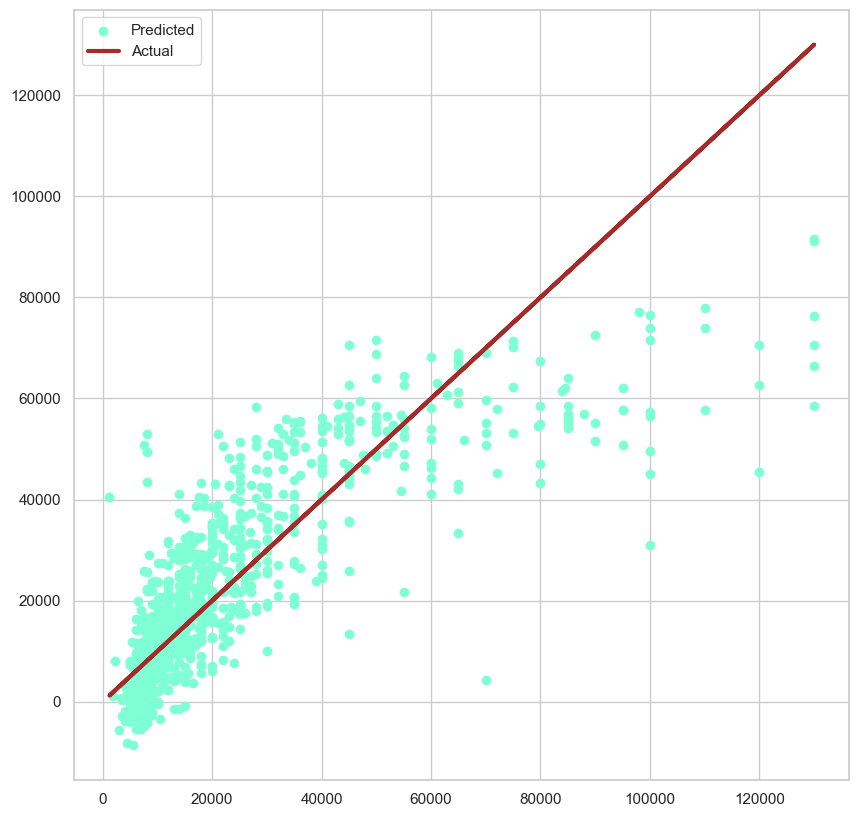

In [36]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_preds, color='aquamarine', label='Predicted' )
plt.plot(y_test, y_test, color='brown', linewidth=3, label='Actual')
plt.legend()